<a href="https://colab.research.google.com/github/tlalarus/charuco/blob/main/calibration_charuco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv2
from glob import glob
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

entry_path = '/content/drive/My Drive/notebooks/calibration'

Mounted at /content/drive


# Corner Detection (basic)

In [ ]:
from google.colab.patches import cv2_imshow
from cv2 import aruco

# Charuco 보드 파라미터 설정
charco_board_row_count = 5
charco_board_col_count = 7
square_length = 0.03
marker_length = 0.022

# ArUco 딕셔너리 로드
dictionary = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)

image size=  (600, 800, 3)


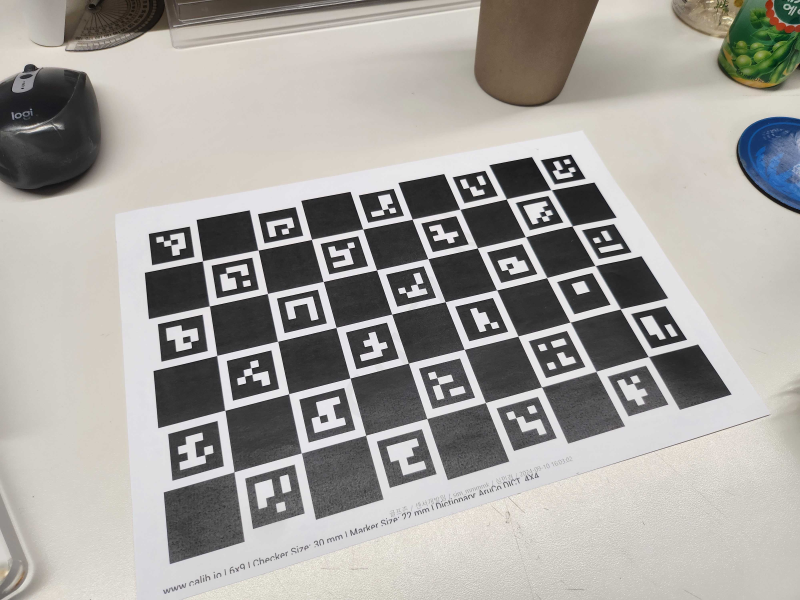

In [ ]:
# Detect Charuco board
fname = glob(entry_path + '/board_charuco' + '/*.jpg')
img = cv2.imread(fname[0])
img = cv2.resize(img, (0,0), fx=0.2, fy=0.2, interpolation=cv2.INTER_AREA)
print('image size= ', img.shape)

cv2_imshow(img)

In [ ]:
import numpy as np

# Detect Charuco board
board = aruco.CharucoBoard((charco_board_row_count, charco_board_col_count), square_length, marker_length, dictionary)
detector = aruco.CharucoDetector(board)

charucoCorners, charucoIds, markerCorners, markerIds = detector.detectBoard(img)
corners_arr = np.array(markerCorners)
print(corners_arr.shape)
lt_corners = corners_arr[:, :, 0, :]
rt_corners = corners_arr[:, :, 1, :]
rb_corners = corners_arr[:, :, 2, :]
lb_corners = corners_arr[:, :, 3, :]

lt_corners = lt_corners.reshape(-1, 2)
rt_corners = rt_corners.reshape(-1, 2)
rb_corners = rb_corners.reshape(-1, 2)
lb_corners = lb_corners.reshape(-1, 2)

for (corner, id)in zip(lt_corners, markerIds):
  print('ID:', id, corner)


(20, 1, 4, 2)
ID: [5] [415. 190.]
ID: [23] [499. 424.]
ID: [18] [411. 377.]
ID: [24] [624. 387.]
ID: [19] [537. 341.]
ID: [14] [454. 298.]
ID: [20] [654. 309.]
ID: [9] [374. 257.]
ID: [15] [571. 268.]
ID: [10] [492. 229.]
ID: [16] [681. 240.]
ID: [11] [602. 202.]
ID: [0] [341. 152.]
ID: [6] [527. 165.]
ID: [1] [453. 129.]
ID: [12] [706. 177.]
ID: [7] [631. 142.]
ID: [2] [558. 108.]
ID: [8] [728. 120.]
ID: [3] [657.  88.]


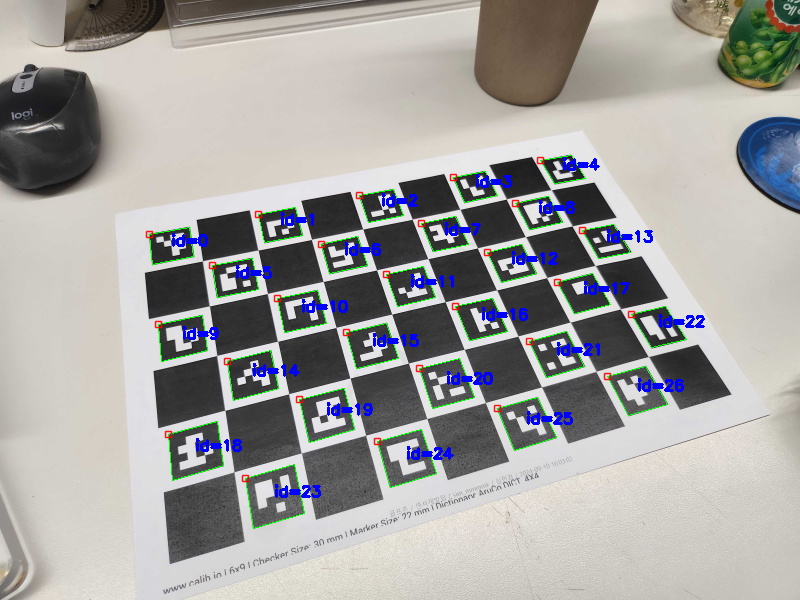

In [ ]:
# Draw detected markers and corners
image_copy = img.copy()
if markerIds is not None:
  cv2.aruco.drawDetectedMarkers(image_copy, markerCorners, markerIds)
cv2_imshow(image_copy)

In [ ]:
image_copy2 = img.copy()
if charucoCorners is not None:
  cv2.aruco.drawDetectedCornersCharuco(image_copy2, charucoCorners, charucoIds)
  cv2_imshow(image_copy2)
else:
  print('No Charuco corners detected')

No Charuco corners detected


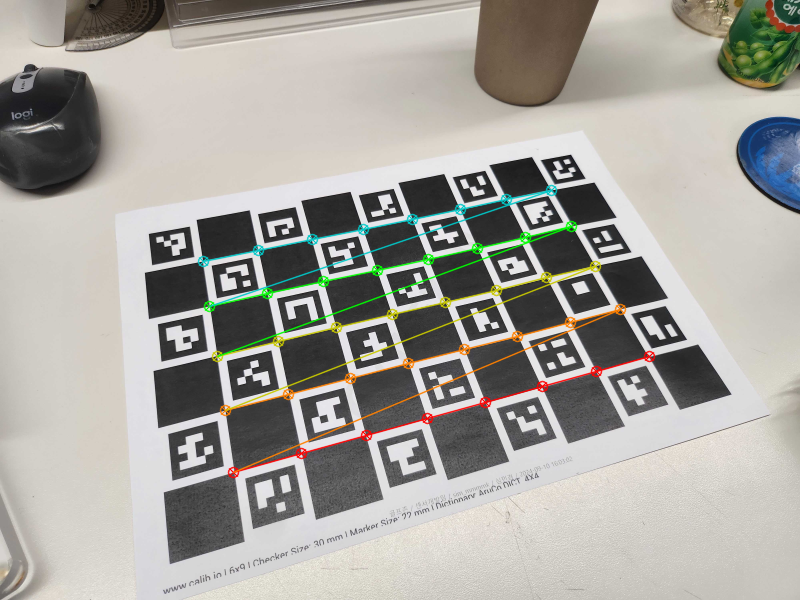

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (8,5), None)

if ret == True:
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
  corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

  image_copy3 = img.copy()
  cv2.drawChessboardCorners(image_copy3, (8,5), corners2, ret)

  cv2_imshow(image_copy3)


# Corner detection (cropped)

image loaded 6


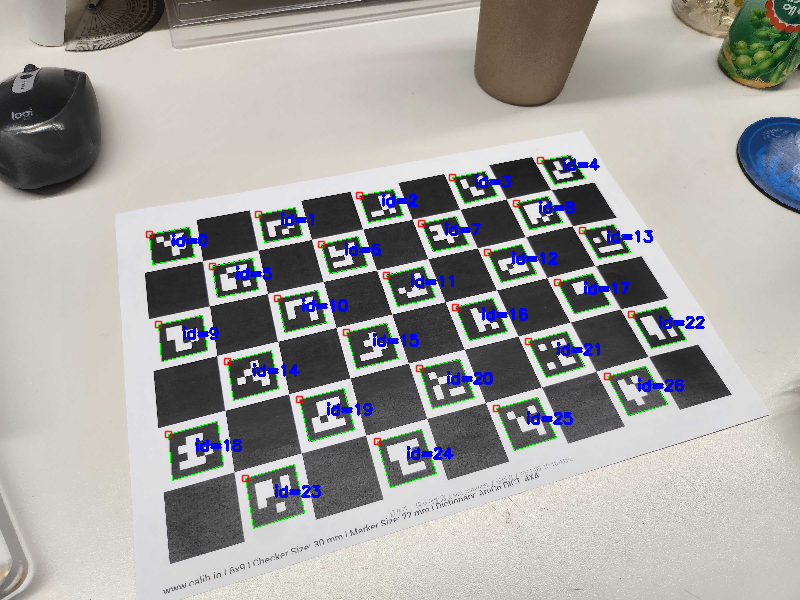

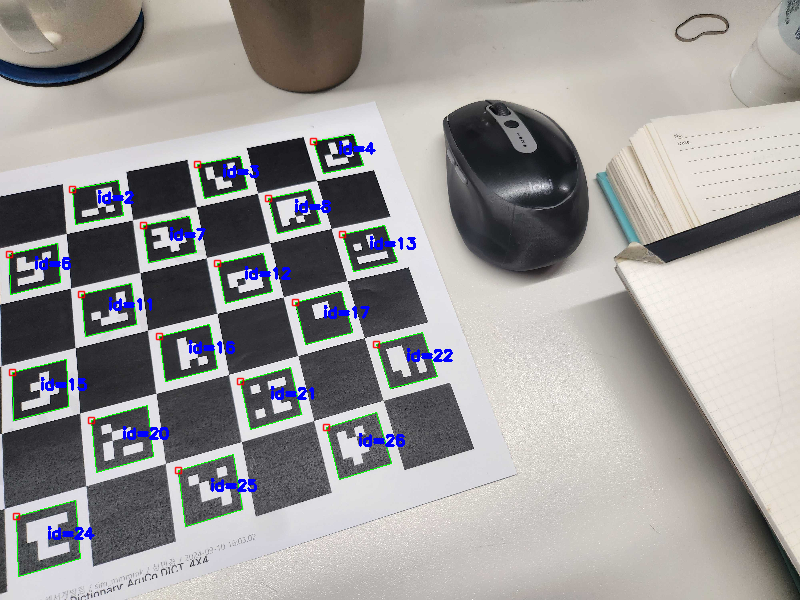

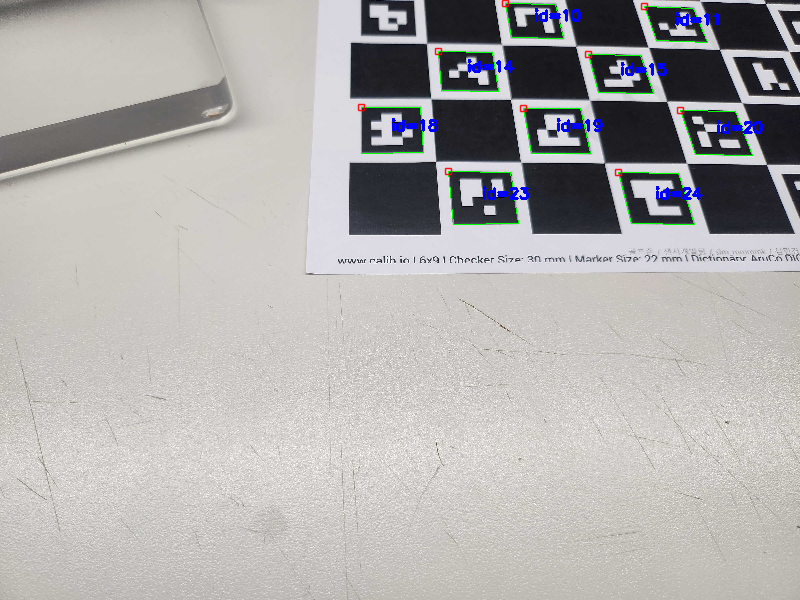

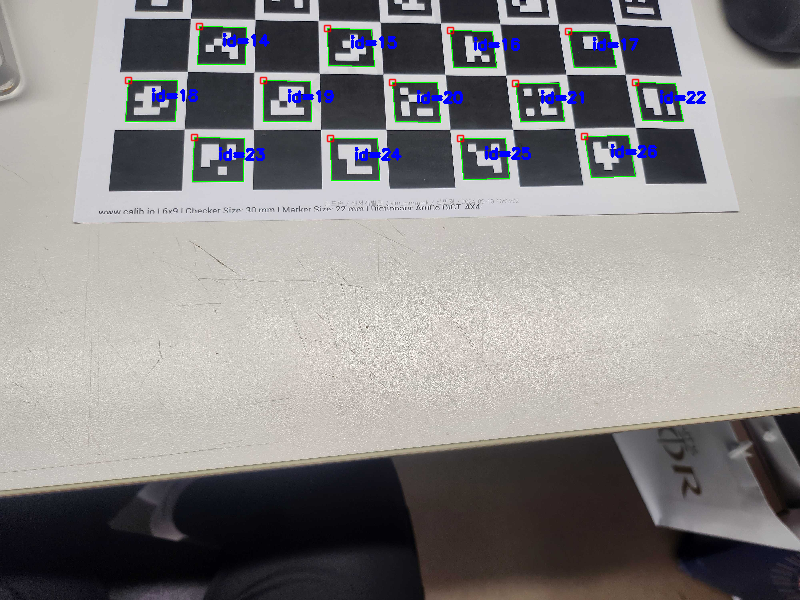

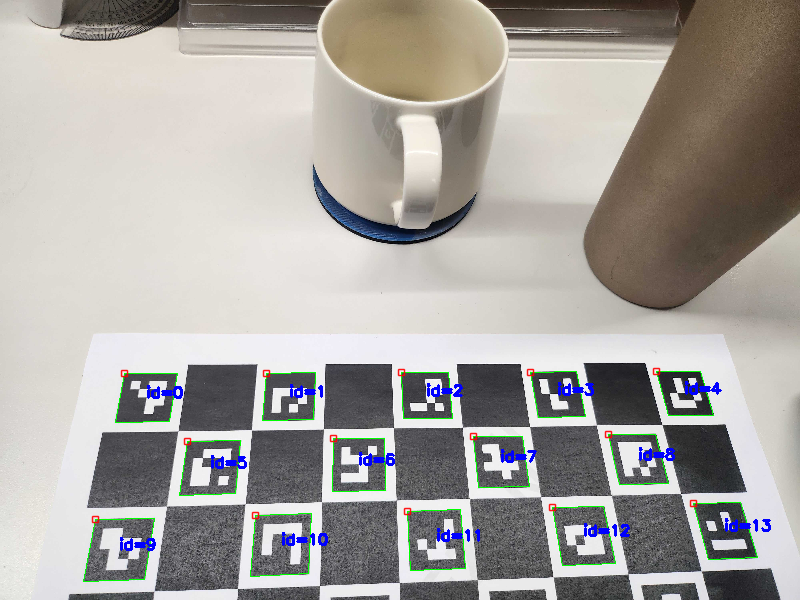

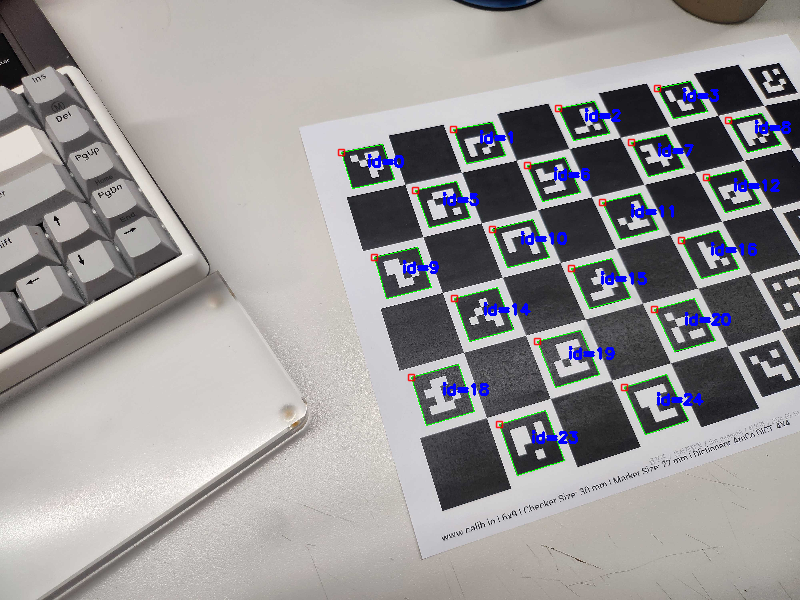

In [ ]:
board_path = entry_path + '/board_charuco'
images = glob(board_path + '/*.jpg')

print('image loaded', len(images))
for fname in images:
  img = cv2.imread(fname)
  img = cv2.resize(img, (0,0), fx=0.2, fy=0.2)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  cc, cid, mc, mid = detector.detectBoard(gray)
  copy = img.copy()
  if mid is not None:
    cv2.aruco.drawDetectedMarkers(copy, mc, mid)
  else:
    print('No markers detected:', fname)
  cv2_imshow(copy)
